# Group - 9
## Naive Bayes Transfer Classifier


In [ ]:
import os
import string
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### Splitting Data into test and train sets using 20newsgroups dataset. (we are only using a small set from the original dataset).

In [ ]:
# A = rec, A1 = comp.windows.x, A2 = rec.sport.hockey -> class 0
# B = talk, B1 = talk.politics.guns, B2 = talk.politics.mideast -> class 1

X_Train = [] 
Y_Train = [] 

for doc in os.listdir('mini_newsgroups/rec.sport.baseball'):
  with open('mini_newsgroups/rec.sport.baseball/'+doc, "r") as f: 
            X_Train.append((doc,f.read()))
            Y_Train.append('rec')

for doc in os.listdir('mini_newsgroups/talk.politics.guns'):
  with open('mini_newsgroups/talk.politics.guns/'+doc, "r") as f: 
            X_Train.append((doc,f.read()))
            Y_Train.append('talk')

num_classes = 2           

In [ ]:
X_Test = [] 
Y_Test = [] 
for doc in os.listdir('mini_newsgroups/rec.sport.hockey'):
  with open('mini_newsgroups/rec.sport.hockey/'+doc, "r") as f:
            X_Test.append((doc,f.read()))
            Y_Test.append('rec')

for doc in os.listdir('mini_newsgroups/talk.politics.mideast'):
  with open('mini_newsgroups/talk.politics.mideast/'+doc, "r") as f:
            X_Test.append((doc,f.read()))
            Y_Test.append('talk')

num_classes = 2     

### Choosing features

In [ ]:
# A list of common english words which should not affect predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [ ]:
# Building a vocabulary of words from the given documents
vocab = {}    #dictionary with unique words (key) and their freq (value)
for i in range(len(X_Train)):   #ith document
    word_list = []
    for word in X_Train[i][1].split():   #X_train[i][0] has file no.
        word_new  = word.strip(string.punctuation).lower()   #strip(..) removes punctuation characters from beginning and end
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1            

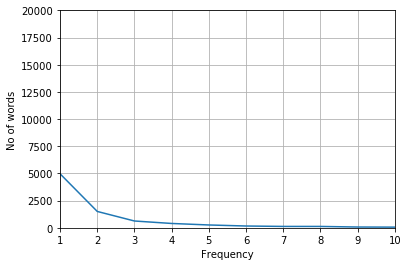

In [ ]:
# Plotting a graph of no of words with a given frequency to decide cutoff drequency

num_words = [0 for i in range(max(vocab.values())+1)]  # i goes till it covers all frequenicies till most freq word, num_words is a list of all possible freq
freq = [i for i in range(max(vocab.values())+1)]       # x axis
total_words = 0

for key in vocab:
    num_words[vocab[key]]+=1  # num_words[with this freq] = ? how much
    
for i in range (len(num_words)):
    total_words += num_words[i]
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")  #no of words with each freq
plt.grid()
plt.show()

In [ ]:
cutoff_freq = 150
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(150) : 13


In [ ]:
# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [ ]:
features

['path',
 'newsgroups',
 'subject',
 'message-id',
 'date',
 'apr',
 'references',
 'organization',
 'lines',
 'article',
 'writes',
 '1993',
 'gmt']

In [ ]:
X_train = np.zeros((len(X_Train),len(features)))
for i in range(len(X_Train)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_Train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train[i][features.index(word)] += 1

X_test = np.zeros((len(X_Test),len(features)))
for i in range(len(X_Test)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_Test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test[i][features.index(word)] += 1

Y_train = np.zeros(len(Y_Train))
for i in range(len(Y_Train)):
    if(Y_Train[i].find("talk")):
        Y_train[i] = 1
        
Y_test = np.zeros(len(Y_Test))
for i in range(len(Y_Test)):
    if(Y_Test[i].find("talk")):
        Y_test[i] = 1

### Algorithm - 1

In [ ]:
def NTBCAlgorithm(T, p_dl, p_du):
    # Number of iterations T
    # Finding p_c|d
    label1 = 0
    for i in range(len(Y_train)):
        if Y_train[i] == 1:
            label1+=1
            
    # initializations
    p_cd = np.zeros((2, len(X_train)))
    p_wc = np.zeros((2, len(features)))
    p_c = np.zeros((2))
    p_d = np.zeros((len(X_train))) 
    p_c_Du = np.zeros((2))
    p_c_Dl = np.zeros((2))
    
    n_w_c_Dl = np.zeros((len(features), 2))
    n_w_c_Du = np.zeros((len(features), 2))
    
    n_c_Dl = np.zeros((2))
    n_c_Du = np.zeros((2))
    
    p_wc_Dl = np.zeros((len(features), 2))
    p_wc_Du = np.zeros((len(features), 2))
    
    p_Du = np.asarray([])
    
    p_Dl = np.asarray([])
    p_c[1] = label1/len(Y_train_dataset)
    p_c[0] = 1-p_c[1]
    n_w_c = np.zeros((len(features), 2))
    nC = np.zeros((2))
    
    for w in range(len(features)):
        for c in range(num_classes):
            for d in range(len(X_test)):
                if(Y_test[d] == c):
                    n_w_c[w][c] += X_test[d][w]
                    nC[c] += 1

    for c in range(num_classes):
        for w in range(len(features)):
            p_wc[c][w] = (1+n_w_c[w][c])/(len(features)+nC[c])


    #start of algorithm
    for t in range(1,T+1):
        
        # Equation 6
        for c in range(num_classes):
            for d in range(len(X_test)):
                temp = p_c[c]
                for w in range(len(X_test[d])):
                    if(Y_test[d] == c):
                        temp *= pow(p_wc[c][w], X_test[d][w])
                p_cd[c][d] = temp
                
        # Equation 7
        for c in range(num_classes):             
            for c in range (num_classes):
                for d in range (len(X_train)):
                    p_c_Du[c] += p_cd[c][d]*(1/len(X_train))

                for d in range (len(X_test)):
                    p_c_Dl[c] += p_cd[c][d]*(1/len(X_test))
            p_c[c] = p_du*p_c_Du[c] + p_dl*p_c_Dl[c]
            
            for w in range(len(features)):
                for c in range(num_classes):
                    for d in range(len(X_train)):
                        n_w_c_Dl[w][c] += X_train[d][w]*p_cd[c][d]
                    for d in range(len(X_test)):
                        n_w_c_Du[w][c] += X_test[d][w]*p_cd[c][d]

            for d in range (len(X_train)):
                n_c_Dl[c] += np.sum(X_train[d])*p_cd[c][d]

            for d in range (len(X_test)):
                n_c_Du[c] += np.sum(X_train[d])*p_cd[c][d]

            for w in range(len(features)):
                for c in range(num_classes):
                    p_wc_Dl[w][c] = (1+n_w_c_Dl[w][c])/(len(features)+n_c_Dl[c])
                    p_wc_Du[w][c] = (1+n_w_c_Du[w][c])/(len(features)+n_c_Du[c])

            for w in range(len(features)):
                p_wc[c][w] = p_du*p_c_Du[c]*p_wc_Du[w][c] + p_dl*p_c_Dl[c]*p_wc_Dl[w][c]

    return p_cd

### KL- Divergence

In [ ]:
from scipy.special import rel_entr

def KL_Divergence(dist1, dist2):
    return sum(rel_entr(dist1, dist2))

### Finding Probability Distributions

In [ ]:
# Finding Probability distribution of Labelled set and Unlabelled set

def prob_dist(data):
    probabilities = []
    sumt= 0
    for i in range(len(data[0])):
        count = 0
        for j in range(len(data)):
            count += data[j][i]
        probabilities.append(count)

    for i in range(len(probabilities)):
        sumt += probabilities[i]

    probabilities = probabilities/sumt

    return probabilities

### Algorithm - 2

In [ ]:
def NTBCwithAutomaticParameterSetting():
    dist1  = prob_dist(X_train)
    dist2 = prob_dist(X_test)
    kl_div = KL_Divergence(dist1, dist2)
    gamma = 0.042*(math.pow(kl_div, -2.276))
    p_Dl = np.float64(gamma/(1+gamma))
    p_Du = 1 - p_Dl
    return NTBCAlgorithm(3, p_Dl, p_Du)

In [ ]:
print(NTBCwithAutomaticParameterSetting())

[[5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
  5.0000

### Traditional Naive Bayes Classifier

In [ ]:
# Implementing Multinomial Naive Bayes from scratch
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

In [ ]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train,Y_Train)
Y_test_pred = clf2.predict(X_test)
our_score_test = clf2.score(Y_test_pred,Y_Test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_Test, Y_test_pred))

Our score on testing data : 0.605
Classification report for testing data :-
              precision    recall  f1-score   support

         rec       0.60      0.62      0.61       100
        talk       0.61      0.59      0.60       100

    accuracy                           0.60       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.61      0.60      0.60       200

